In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from tqdm.notebook import tqdm

In [2]:
with open('plot1_3dscan_arrays.pkl','rb') as handle:
    supervised_loss_list = pickle.load(handle)
    sigae_loss_list = pickle.load(handle)
    bkgae_loss_list = pickle.load(handle)
    sigae2_loss_list = pickle.load(handle)
    bkgloss_rndbkg = pickle.load(handle)
    sigloss_rndbkg = pickle.load(handle)
    bkgloss_prong2 = pickle.load(handle)
    sigloss_prong2 = pickle.load(handle)
    sig2loss_rndbkg= pickle.load(handle)
    sig2loss_prong2 = pickle.load(handle)

In [6]:
with open('plot1_supervised_arrays.pkl','rb') as handle:
    sup_tpr_inv= pickle.load(handle)
    sup_fpr_inv= pickle.load(handle)

In [4]:
def get_hull_coordinates(scan_tpr, scan_fpr):
    points = np.array([scan_fpr,scan_tpr])
    points = points.transpose()
    hull = ConvexHull(points)
    fpr = np.array(points[hull.vertices[:],0])
    tpr = np.array(points[hull.vertices[:],1])
    nonzero_idx = np.nonzero(fpr)
    fpr = fpr[nonzero_idx]
    tpr = tpr[nonzero_idx]
    return tpr, fpr 

In [4]:
sigae_loss_list[0]

array([2.8773212, 1.5348657, 2.1564658, ..., 2.2267156, 2.1705143,
       3.3313568], dtype=float32)

In [5]:
np.array([1,2],dtype=np.float)

array([1., 2.])

In [13]:
sigaebins = np.concatenate((np.arange(0,1.5,0.05), np.arange(1.5,2.5,0.06),np.arange(2.5,5,0.05), np.arange(5,20,0.1)    ) )

In [14]:
sigae2bins = np.concatenate((np.arange(0,2,0.02),np.arange(2,3,0.05), np.arange(3,13,.5)    ) )

In [15]:
bkgaebins = np.concatenate((np.arange(0,2.5,0.07),np.arange(2.5,3,0.1), np.arange(3,10,0.2), np.arange(10,16,8)    ) )

In [35]:
sigaebins = np.concatenate((np.arange(0,5,0.02), np.arange(5,20,0.1)    ) )

In [36]:
sigae2bins = np.concatenate((np.arange(0,5,0.02), np.arange(5,20,0.1)    ) )

In [37]:
bkgaebins = np.concatenate((np.arange(0,2.5,0.07),np.arange(2.5,3,0.1), np.arange(3,10,0.2), np.arange(10,16,8)    ) )

In [38]:
sigaebins.shape

(400,)

In [39]:
sigae2bins.shape

(400,)

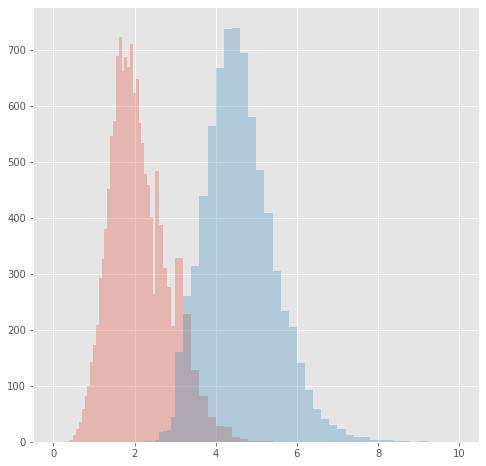

In [41]:
#plt.hist(bkgloss_rndbkg,alpha=0.3,bins = bkgaebins);

plt.hist(bkgae_loss_list[0],alpha=0.3,bins = bkgaebins);
plt.hist(bkgae_loss_list[1],alpha=0.3,bins = bkgaebins);


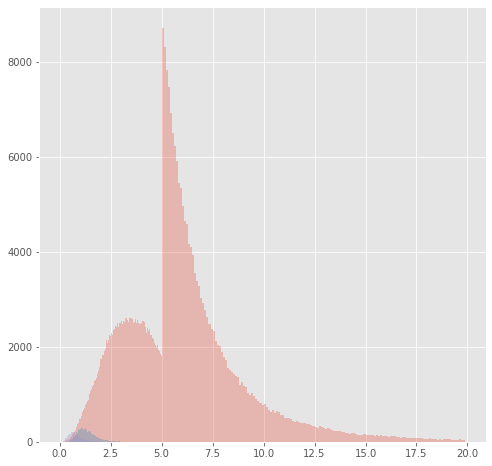

In [42]:
plt.hist(sig2loss_rndbkg,alpha=0.3,bins = sigae2bins);
plt.hist(sigae2_loss_list[0],alpha=0.3,bins = sigae2bins);
plt.hist(sigae2_loss_list[1],alpha=0.3,bins = sigae2bins);


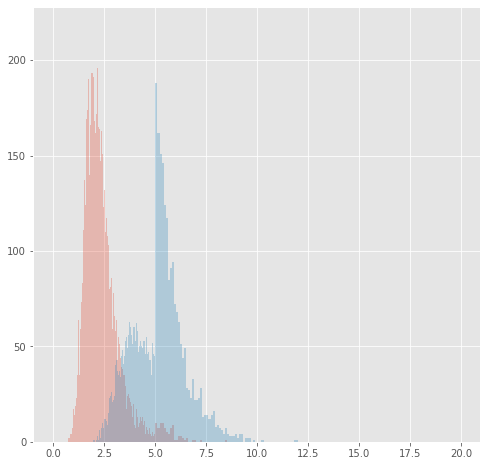

In [44]:
#plt.hist(sigloss_rndbkg,alpha=0.3,bins = sigaebins);

plt.hist(sigae_loss_list[0],alpha=0.3,bins = sigaebins);
plt.hist(sigae_loss_list[1],alpha=0.3,bins = sigaebins);

#plt.hist(sigae_loss_list[1],bins = np.arange(0,20,0.1))
#plt.yscale('log')

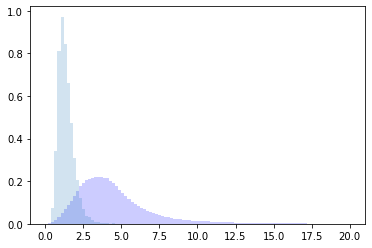

In [23]:
bins = np.linspace(0,20,101)
#plt.ylim((0,250))
plt.hist(sig2loss_rndbkg, color='b', density= True,bins = bins,alpha = 0.2);

#plt.hist(bkgloss_prong2, density= True,bins = bins,alpha = 0.2);
plt.hist(sigae2_loss_list[0],density= True,bins = bins,alpha = 0.2);
#plt.hist(bkgae_loss_list[1],density= True,bins = bins,alpha = 0.2);
#plt.hist(bkgae_loss_list[2],density= True,bins = bins,alpha = 0.2);
#plt.hist(bkgae_loss_list[3],density= True,bins = bins,alpha = 0.2);


In [24]:
def get_tpr_fpr_2d(sigae_sigloss,sigae_bkgloss,bkgae_sigloss,bkgae_bkgloss):
    bins_bkgae = bkgaebins
    bins_sigae = sigaebins
    tpr = []
    fpr = []
    for sigcut in tqdm(bins_sigae,position=0, leave=False):
        for bkgcut in tqdm(bins_bkgae,position=0, leave=False):
            tpr_t = np.where((sigae_sigloss<sigcut)&(bkgae_sigloss>bkgcut))[0].shape[0]/len(sigae_sigloss)
            fpr_t = np.where((sigae_bkgloss<sigcut)&(bkgae_bkgloss>bkgcut))[0].shape[0]/len(sigae_bkgloss)
            tpr.append(tpr_t)
            fpr.append(fpr_t)
            
    tpr, fpr = get_hull_coordinates(tpr, fpr)
                

    return tpr,fpr


In [25]:
def get_tpr_fpr_3d(sigae_sigloss,sigae_bkgloss,sigae2_sigloss,sigae2_bkgloss,bkgae_sigloss,bkgae_bkgloss):
    bins_bkgae = bkgaebins
    bins_sigae = sigaebins
    bins_sigae2 = sigae2bins
    tpr = []
    fpr = []
    for sigcut in tqdm(bins_sigae,position=0, leave=False):
        for sigcut2 in tqdm(bins_sigae2,position=0, leave=False):
            for bkgcut in bins_bkgae:
                tpr_t = np.where((sigae2_sigloss<sigcut2)&(sigae_sigloss<sigcut)&(bkgae_sigloss>bkgcut))[0].shape[0]/len(sigae_sigloss)
                fpr_t = np.where((sigae2_bkgloss<sigcut2)&(sigae_bkgloss<sigcut)&(bkgae_bkgloss>bkgcut))[0].shape[0]/len(sigae_bkgloss)
                tpr.append(tpr_t)
                fpr.append(fpr_t)
            
    tpr, fpr = get_hull_coordinates(tpr, fpr)
                

    return tpr,fpr

In [26]:
def get_tpr_fpr_bkg(sigloss,bkgloss):
    bins = np.arange(0.,100,.01)
    tpr = []
    fpr = []
    for cut in bins:
        tpr.append(np.where(sigloss>cut)[0].shape[0]/len(sigloss))
        fpr.append(np.where(bkgloss>cut)[0].shape[0]/len(bkgloss))

    return tpr,fpr

In [28]:
tprlistbkgaej1mass = []
fprlistbkgaej1mass = []
fprinverselistbkgaej1mass = []
tprlistbkgaej1mass_forinverse = []

bkgref_tpr, bkgref_fpr = get_tpr_fpr_bkg(bkgloss_prong2,bkgloss_rndbkg)
bkgref_tpr_np, bkgref_fpr_np = np.array(bkgref_tpr), np.array(bkgref_fpr)
nonzero_idx = np.nonzero(bkgref_fpr_np)
bkgref_tpr_inv = bkgref_tpr_np[nonzero_idx]
bkgref_fpr_inv = 1/bkgref_fpr_np[nonzero_idx]


for a in bkgae_loss_list:
    tpr, fpr = get_tpr_fpr_bkg(a,bkgloss_rndbkg)
    #print()
    tprlistbkgaej1mass.append(tpr)
    fprlistbkgaej1mass.append(fpr)
    fpr_np = np.array(fpr)
    tpr_np = np.array(tpr)
    nonzero_idx = np.nonzero(fpr_np)
    tprlistbkgaej1mass_forinverse.append(tpr_np[nonzero_idx])
    fprinverselistbkgaej1mass.append(1/fpr_np[nonzero_idx])
    #print(fpr)
    #fprinverselistbkgaej1mass.append(1/fpr_np)

In [29]:
tprlistscanj1mass = []
fprlistscanj1mass = []
fprinverselistscanj1mass = []
tprlistscanj1mass_forinverse = []

tprlistscanj1mass_3d = []
fprlistscanj1mass_3d = []
fprinverselistscanj1mass_3d = []
tprlistscanj1mass_forinverse_3d = []

#scanref_tpr, scanref_fpr = get_tpr_fpr_2d(sigloss_prong2,sigloss_rndbkg,bkgloss_prong2,bkgloss_rndbkg)
#scanref_tpr_3d, scanref_fpr_3d = get_tpr_fpr_3d(sigloss_prong2,sigloss_rndbkg,sig2loss_prong2,sig2loss_rndbkg,bkgloss_prong2,bkgloss_rndbkg)


#scanref_tpr_inv = scanref_tpr
#scanref_fpr_inv = 1/scanref_fpr

#scanref_tpr_3d_inv = scanref_tpr_3d
#scanref_fpr_3d_inv = 1/scanref_fpr_3d


for a,b,c in tqdm(zip(sigae_loss_list,bkgae_loss_list,sigae2_loss_list)):
    tpr, fpr = get_tpr_fpr_2d(a,sigloss_rndbkg, b, bkgloss_rndbkg)
    tpr_3d, fpr_3d = get_tpr_fpr_3d(a,sigloss_rndbkg,c, sig2loss_rndbkg,b, bkgloss_rndbkg)
    #print()
    tprlistscanj1mass.append(tpr)
    fprlistscanj1mass.append(fpr)
    tprlistscanj1mass_3d.append(tpr_3d)
    fprlistscanj1mass_3d.append(fpr_3d)

    tprlistscanj1mass_forinverse.append(tpr)
    fprinverselistscanj1mass.append(1/fpr)
    tprlistscanj1mass_forinverse_3d.append(tpr_3d)
    fprinverselistscanj1mass_3d.append(1/fpr_3d)
    
    
    #print(fpr)
    #fprinverselistbkgaej1mass.append(1/fpr_np)
    
with open('plot1_ROC_ver3.pkl','wb') as handle:
    pickle.dump(bkgref_tpr, handle)
    pickle.dump(bkgref_fpr, handle)
    pickle.dump(bkgref_tpr_inv, handle)
    pickle.dump(bkgref_fpr_inv, handle)
    pickle.dump(tprlistbkgaej1mass, handle)
    pickle.dump(fprlistbkgaej1mass, handle)
    pickle.dump(tprlistbkgaej1mass_forinverse, handle)
    pickle.dump(fprinverselistbkgaej1mass, handle)
    #pickle.dump(scanref_tpr, handle)
    #pickle.dump(scanref_fpr, handle)
    #pickle.dump(scanref_tpr_3d, handle)
    #pickle.dump(scanref_fpr_3d, handle)
    
    #pickle.dump(scanref_tpr_inv, handle)
    #pickle.dump(scanref_fpr_inv, handle)
    #pickle.dump(scanref_tpr_3d_inv, handle)
    #pickle.dump(scanref_fpr_3d_inv, handle)
    pickle.dump(tprlistscanj1mass, handle)
    pickle.dump(fprlistscanj1mass, handle)
    pickle.dump(tprlistscanj1mass_3d, handle)
    pickle.dump(fprlistscanj1mass_3d, handle)
    pickle.dump(tprlistscanj1mass_forinverse, handle)
    pickle.dump(fprinverselistscanj1mass, handle)
    pickle.dump(tprlistscanj1mass_forinverse_3d, handle)
    pickle.dump(fprinverselistscanj1mass_3d, handle)


In [72]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [15]:
plt.rcParams["figure.figsize"] = (8,8)
plt.style.use('seaborn-bright')

In [4]:
with open('plot1_ROC_ver3.pkl','rb') as handle:
    _ = pickle.load(handle)
    _ = pickle.load(handle)
    _ = pickle.load(handle)
    _ = pickle.load(handle)
    _ = pickle.load(handle)
    _ = pickle.load(handle)
    tprlistbkgaej1mass_forinverse = pickle.load(handle)
    fprinverselistbkgaej1mass = pickle.load(handle)
    #pickle.dump(scanref_tpr, handle)
    #pickle.dump(scanref_fpr, handle)
    #pickle.dump(scanref_tpr_3d, handle)
    #pickle.dump(scanref_fpr_3d, handle)
    
    #pickle.dump(scanref_tpr_inv, handle)
    #pickle.dump(scanref_fpr_inv, handle)
    #pickle.dump(scanref_tpr_3d_inv, handle)
    #pickle.dump(scanref_fpr_3d_inv, handle)
    _ = pickle.load(handle)
    _ = pickle.load(handle)
    _ = pickle.load(handle)
    _ = pickle.load(handle)
    tprlistscanj1mass_forinverse = pickle.load(handle)
    fprinverselistscanj1mass = pickle.load(handle)
    tprlistscanj1mass_forinverse_3d = pickle.load(handle)
    fprinverselistscanj1mass_3d = pickle.load(handle)

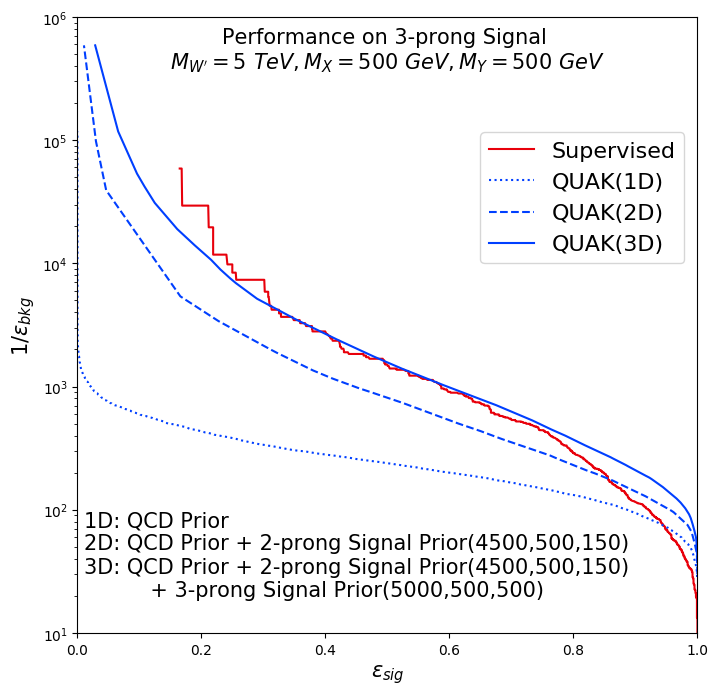

In [17]:
#plt.plot(scanref_tpr_3d_inv,scanref_fpr_3d_inv,label='2prong 4500 500 150 (correct),3d')
#plt.plot(tprlistbkgaej1mass_forinverse[0][:-1],fprinverselistbkgaej1mass[0][:-1],color='C0',label='QUAK(1D) 3prong 4500 300 300',linestyle='dotted')
#plt.plot(tprlistscanj1mass_forinverse[0][:-1],fprinverselistscanj1mass[0][:-1],color='C0',label='QUAK(2D) 3prong 4500 300 300',linestyle='dashed')
#plt.plot(tprlistscanj1mass_forinverse_3d[0][:-1],fprinverselistscanj1mass_3d[0][:-1],color='C0',label='QUAK(3D) 3prong 4500 300 300')

plt.plot(sup_tpr_inv,sup_fpr_inv,color='C2', label='Supervised')
plt.plot(tprlistbkgaej1mass_forinverse[1][250:-7],fprinverselistbkgaej1mass[1][250:-7],color='C0',label='QUAK(1D)',linestyle='dotted')
plt.plot(tprlistscanj1mass_forinverse[1][2:-14],fprinverselistscanj1mass[1][2:-14],color='C0',label='QUAK(2D)',linestyle='dashed')
plt.plot(tprlistscanj1mass_forinverse_3d[1][3:-14],fprinverselistscanj1mass_3d[1][3:-14],color='C0',label='QUAK(3D)')
#plt.plot(tprlistscanj1mass_forinverse_3d[2][:],fprinverselistscanj1mass_3d[2][:],label='2prong 4500 500 300,3d')
#plt.plot(tprlistscanj1mass_forinverse_3d[3][:],fprinverselistscanj1mass_3d[3][:],label='2prong 4500 700 300,3d')
#plt.plot(tprlistscanj1mass_forinverse_3d[4][1:-3],fprinverselistscanj1mass_3d[4][1:-3],label='2prong 6000 700 150,3d',color='r')
#plt.plot(tprlistscanj1mass_forinverse_3d[5][:-3],fprinverselistscanj1mass_3d[5][:-3],label='2prong 6000 500 300,3d',color='g')
#plt.plot(tprlistscanj1mass_forinverse_3d[6][1:-4],fprinverselistscanj1mass_3d[6][1:-4],label='2prong 6000 700 300,3d',color='b')

#plt.plot(scanref_tpr_inv,scanref_fpr_inv,label='2prong 4500 500 150 (correct)',linestyle='dashed')
#plt.plot(tprlistscanj1mass_forinverse[2][:],fprinverselistscanj1mass[2][:],label='2prong 4500 500 300',linestyle='dashed')
#plt.plot(tprlistscanj1mass_forinverse[3][:],fprinverselistscanj1mass[3][:],label='2prong 4500 700 300',linestyle='dashed')
#plt.plot(tprlistscanj1mass_forinverse[4][1:-3],fprinverselistscanj1mass[4][1:-3],label='2prong 6000 700 150',linestyle='dashed',color='r')
#plt.plot(tprlistscanj1mass_forinverse[5][:-3],fprinverselistscanj1mass[5][:-3],label='2prong 6000 500 300',linestyle='dashed',color='g')
#plt.plot(tprlistscanj1mass_forinverse[6][1:-4],fprinverselistscanj1mass[6][1:-4],label='2prong 6000 700 300',linestyle='dashed',color='b')

#plt.plot(fprlistsigaej1mass[6],tprlistsigaej1mass[6],label='j1mass 850')

#plt.plot(fprlist[2],tprlist[2],label='Bkg VAE-Vanilla')
#plt.plot(fprlist[3],tprlist[3],label='Bkg VAE-Vanilla')
#plt.plot(fprlist[4],tprlist[4],label='mjj 5500')
#plt.plot(fprlist[5],tprlist[5],label='mjj 6000')

plt.yscale('log')
plt.xlabel(r'$\epsilon_{sig}$',fontsize=15)
plt.ylabel(r'$1/\epsilon_{bkg}$',fontsize=15)
#plt.semilogy()
plt.title('Performance on 3-prong Signal \n$M_{W^\prime}=5\ TeV, M_{X}=500\ GeV, M_{Y}=500\ GeV$',fontsize=15,x=0.5, y=0.9)
leg = plt.legend(loc=(0.65, 0.60),prop={'size':16})
leg.get_title().set_fontsize('14')
plt.xlim([0.0,1.0])
plt.ylim([10,1e6])
plt.text(0.01, 20, '1D: QCD Prior\n2D: QCD Prior + 2-prong Signal Prior(4500,500,150)\n3D: QCD Prior + 2-prong Signal Prior(4500,500,150) \n          + 3-prong Signal Prior(5000,500,500)', fontsize=15)
plt.savefig('plot1_with_supervised_NEW.png')
plt.savefig('plot1_with_supervised_NEW.pdf')
#plt.ylim([0.0,1.0])
#plt.savefig('ROC_Curve_zdim_fnum.png')

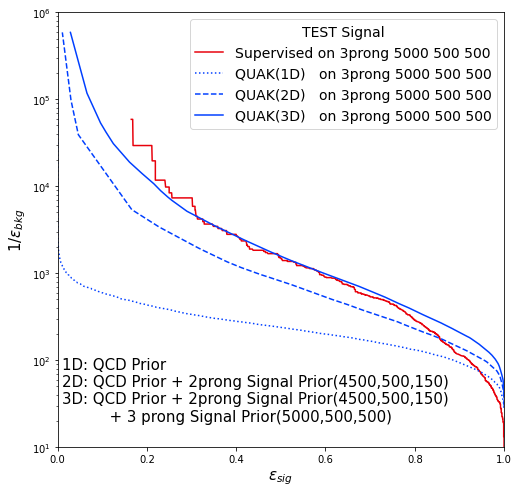

In [24]:
#plt.plot(scanref_tpr_3d_inv,scanref_fpr_3d_inv,label='2prong 4500 500 150 (correct),3d')
#plt.plot(tprlistbkgaej1mass_forinverse[0][:-1],fprinverselistbkgaej1mass[0][:-1],color='C0',label='QUAK(1D) 3prong 4500 300 300',linestyle='dotted')
#plt.plot(tprlistscanj1mass_forinverse[0][:-1],fprinverselistscanj1mass[0][:-1],color='C0',label='QUAK(2D) 3prong 4500 300 300',linestyle='dashed')
#plt.plot(tprlistscanj1mass_forinverse_3d[0][:-1],fprinverselistscanj1mass_3d[0][:-1],color='C0',label='QUAK(3D) 3prong 4500 300 300')

plt.plot(sup_tpr_inv,sup_fpr_inv,color='C2', label='Supervised on 3prong 5000 500 500')
plt.plot(tprlistbkgaej1mass_forinverse[1][250:-7],fprinverselistbkgaej1mass[1][250:-7],color='C0',label='QUAK(1D)   on 3prong 5000 500 500',linestyle='dotted')
plt.plot(tprlistscanj1mass_forinverse[1][2:-14],fprinverselistscanj1mass[1][2:-14],color='C0',label='QUAK(2D)   on 3prong 5000 500 500',linestyle='dashed')
plt.plot(tprlistscanj1mass_forinverse_3d[1][3:-14],fprinverselistscanj1mass_3d[1][3:-14],color='C0',label='QUAK(3D)   on 3prong 5000 500 500')
#plt.plot(tprlistscanj1mass_forinverse_3d[2][:],fprinverselistscanj1mass_3d[2][:],label='2prong 4500 500 300,3d')
#plt.plot(tprlistscanj1mass_forinverse_3d[3][:],fprinverselistscanj1mass_3d[3][:],label='2prong 4500 700 300,3d')
#plt.plot(tprlistscanj1mass_forinverse_3d[4][1:-3],fprinverselistscanj1mass_3d[4][1:-3],label='2prong 6000 700 150,3d',color='r')
#plt.plot(tprlistscanj1mass_forinverse_3d[5][:-3],fprinverselistscanj1mass_3d[5][:-3],label='2prong 6000 500 300,3d',color='g')
#plt.plot(tprlistscanj1mass_forinverse_3d[6][1:-4],fprinverselistscanj1mass_3d[6][1:-4],label='2prong 6000 700 300,3d',color='b')

#plt.plot(scanref_tpr_inv,scanref_fpr_inv,label='2prong 4500 500 150 (correct)',linestyle='dashed')
#plt.plot(tprlistscanj1mass_forinverse[2][:],fprinverselistscanj1mass[2][:],label='2prong 4500 500 300',linestyle='dashed')
#plt.plot(tprlistscanj1mass_forinverse[3][:],fprinverselistscanj1mass[3][:],label='2prong 4500 700 300',linestyle='dashed')
#plt.plot(tprlistscanj1mass_forinverse[4][1:-3],fprinverselistscanj1mass[4][1:-3],label='2prong 6000 700 150',linestyle='dashed',color='r')
#plt.plot(tprlistscanj1mass_forinverse[5][:-3],fprinverselistscanj1mass[5][:-3],label='2prong 6000 500 300',linestyle='dashed',color='g')
#plt.plot(tprlistscanj1mass_forinverse[6][1:-4],fprinverselistscanj1mass[6][1:-4],label='2prong 6000 700 300',linestyle='dashed',color='b')

#plt.plot(fprlistsigaej1mass[6],tprlistsigaej1mass[6],label='j1mass 850')

#plt.plot(fprlist[2],tprlist[2],label='Bkg VAE-Vanilla')
#plt.plot(fprlist[3],tprlist[3],label='Bkg VAE-Vanilla')
#plt.plot(fprlist[4],tprlist[4],label='mjj 5500')
#plt.plot(fprlist[5],tprlist[5],label='mjj 6000')

plt.yscale('log')
plt.xlabel(r'$\epsilon_{sig}$',fontsize=15)
plt.ylabel(r'$1/\epsilon_{bkg}$',fontsize=15)
#plt.semilogy()
leg = plt.legend(loc='upper right',prop={'size':14},title='TEST Signal')
leg.get_title().set_fontsize('14')
plt.xlim([0.0,1.0])
plt.ylim([10,1e6])
plt.text(0.01, 20, '1D: QCD Prior\n2D: QCD Prior + 2prong Signal Prior(4500,500,150)\n3D: QCD Prior + 2prong Signal Prior(4500,500,150) \n          + 3 prong Signal Prior(5000,500,500)', fontsize=15)
plt.savefig('plot1_with_supervised.png')
plt.savefig('plot1_with_supervised.pdf')
#plt.ylim([0.0,1.0])
#plt.savefig('ROC_Curve_zdim_fnum.png')

# with jet mass

In [10]:
with open('plot1_supervised_arrays_withmass.pkl','rb') as handle:
    sup_tpr_inv2= pickle.load(handle)
    sup_fpr_inv2= pickle.load(handle)

Text(0.01, 20, '1D: QCD Prior\n2D: QCD Prior + 2prong Signal Prior(4500,500,150)\n3D: QCD Prior + 2prong Signal Prior(4500,500,150) \n          + 3 prong Signal Prior(5000,500,500)')

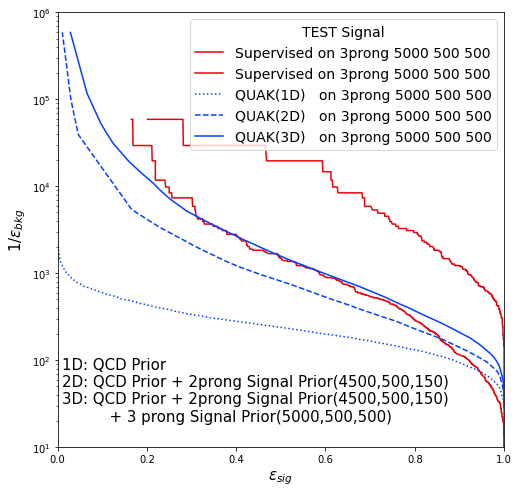

In [12]:
#plt.plot(scanref_tpr_3d_inv,scanref_fpr_3d_inv,label='2prong 4500 500 150 (correct),3d')
#plt.plot(tprlistbkgaej1mass_forinverse[0][:-1],fprinverselistbkgaej1mass[0][:-1],color='C0',label='QUAK(1D) 3prong 4500 300 300',linestyle='dotted')
#plt.plot(tprlistscanj1mass_forinverse[0][:-1],fprinverselistscanj1mass[0][:-1],color='C0',label='QUAK(2D) 3prong 4500 300 300',linestyle='dashed')
#plt.plot(tprlistscanj1mass_forinverse_3d[0][:-1],fprinverselistscanj1mass_3d[0][:-1],color='C0',label='QUAK(3D) 3prong 4500 300 300')

plt.plot(sup_tpr_inv2,sup_fpr_inv2,color='C2', label='Supervised on 3prong 5000 500 500')
plt.plot(sup_tpr_inv,sup_fpr_inv,color='C2', label='Supervised on 3prong 5000 500 500')

plt.plot(tprlistbkgaej1mass_forinverse[1][250:-7],fprinverselistbkgaej1mass[1][250:-7],color='C0',label='QUAK(1D)   on 3prong 5000 500 500',linestyle='dotted')
plt.plot(tprlistscanj1mass_forinverse[1][2:-14],fprinverselistscanj1mass[1][2:-14],color='C0',label='QUAK(2D)   on 3prong 5000 500 500',linestyle='dashed')
plt.plot(tprlistscanj1mass_forinverse_3d[1][3:-14],fprinverselistscanj1mass_3d[1][3:-14],color='C0',label='QUAK(3D)   on 3prong 5000 500 500')
#plt.plot(tprlistscanj1mass_forinverse_3d[2][:],fprinverselistscanj1mass_3d[2][:],label='2prong 4500 500 300,3d')
#plt.plot(tprlistscanj1mass_forinverse_3d[3][:],fprinverselistscanj1mass_3d[3][:],label='2prong 4500 700 300,3d')
#plt.plot(tprlistscanj1mass_forinverse_3d[4][1:-3],fprinverselistscanj1mass_3d[4][1:-3],label='2prong 6000 700 150,3d',color='r')
#plt.plot(tprlistscanj1mass_forinverse_3d[5][:-3],fprinverselistscanj1mass_3d[5][:-3],label='2prong 6000 500 300,3d',color='g')
#plt.plot(tprlistscanj1mass_forinverse_3d[6][1:-4],fprinverselistscanj1mass_3d[6][1:-4],label='2prong 6000 700 300,3d',color='b')

#plt.plot(scanref_tpr_inv,scanref_fpr_inv,label='2prong 4500 500 150 (correct)',linestyle='dashed')
#plt.plot(tprlistscanj1mass_forinverse[2][:],fprinverselistscanj1mass[2][:],label='2prong 4500 500 300',linestyle='dashed')
#plt.plot(tprlistscanj1mass_forinverse[3][:],fprinverselistscanj1mass[3][:],label='2prong 4500 700 300',linestyle='dashed')
#plt.plot(tprlistscanj1mass_forinverse[4][1:-3],fprinverselistscanj1mass[4][1:-3],label='2prong 6000 700 150',linestyle='dashed',color='r')
#plt.plot(tprlistscanj1mass_forinverse[5][:-3],fprinverselistscanj1mass[5][:-3],label='2prong 6000 500 300',linestyle='dashed',color='g')
#plt.plot(tprlistscanj1mass_forinverse[6][1:-4],fprinverselistscanj1mass[6][1:-4],label='2prong 6000 700 300',linestyle='dashed',color='b')

#plt.plot(fprlistsigaej1mass[6],tprlistsigaej1mass[6],label='j1mass 850')

#plt.plot(fprlist[2],tprlist[2],label='Bkg VAE-Vanilla')
#plt.plot(fprlist[3],tprlist[3],label='Bkg VAE-Vanilla')
#plt.plot(fprlist[4],tprlist[4],label='mjj 5500')
#plt.plot(fprlist[5],tprlist[5],label='mjj 6000')

plt.yscale('log')
plt.xlabel(r'$\epsilon_{sig}$',fontsize=15)
plt.ylabel(r'$1/\epsilon_{bkg}$',fontsize=15)
#plt.semilogy()
leg = plt.legend(loc='upper right',prop={'size':14},title='TEST Signal')
leg.get_title().set_fontsize('14')
plt.xlim([0.0,1.0])
plt.ylim([10,1e6])
plt.text(0.01, 20, '1D: QCD Prior\n2D: QCD Prior + 2prong Signal Prior(4500,500,150)\n3D: QCD Prior + 2prong Signal Prior(4500,500,150) \n          + 3 prong Signal Prior(5000,500,500)', fontsize=15)
#plt.savefig('plot1_with_supervised.png')
#plt.savefig('plot1_with_supervised.pdf')
#plt.ylim([0.0,1.0])
#plt.savefig('ROC_Curve_zdim_fnum.png')